# Car auction price estimation

## Introduction

This notebook describes an estimation of car auction bid prices for auctions on the car dealer site KVD https://www.kvd.se/auktion/personbil

Auction data is extracted from the KVD site using the GitHub project at https://github.com/fredriksoderberg/auction-analysis/tree/master/auction_data  

### Data cleaning

In [350]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [351]:
data = pd.read_csv('kvd_auction_20160404.csv', index_col = 0)

Extract data subset (highest bid, estimated action price) 

In [352]:
datasubset = data[['highest_bid', 'estimated_auction_price']]

Remove non digits from price data.

In [354]:
datasubset = datasubset.replace(to_replace=r'[a-z.]|[A-Z]| ', value=r'', regex=True)

Remove rows with empty data.

In [355]:
datasubset.dropna()
datasubset = datasubset[datasubset.estimated_auction_price != '']

Extraction of estimated auction price ranges.

In [356]:
datasubset['est_auction_price_low'] = datasubset['estimated_auction_price'].str.split('-').str[0]
datasubset['est_auction_price_high'] = datasubset['estimated_auction_price'].str.split('-').str[1]

Cast to integer datatype 

In [357]:
datasubset['highest_bid'] = datasubset['highest_bid'].astype(int)
datasubset['est_auction_price_low'] = datasubset['est_auction_price_low'].astype(int)
datasubset['est_auction_price_high'] = datasubset['est_auction_price_high'].astype(int)

### Accuracy of estimated auction prices

Calculate average estimated auction prices

In [358]:
datasubset['avg_est_auction_price'] = datasubset[['est_auction_price_low', 'est_auction_price_high']].mean(axis=1)

Calculate average deviation from (avg) estimated auction price. Get the mean over all auctions.

In [371]:
datasubset['est_auction_price_error'] = \
datasubset['highest_bid'].sub(datasubset['avg_est_auction_price'], axis=0).div(datasubset['avg_est_auction_price'], axis=0).abs()
datasubset['est_auction_price_error'].mean()

0.08683623661995511

Plot

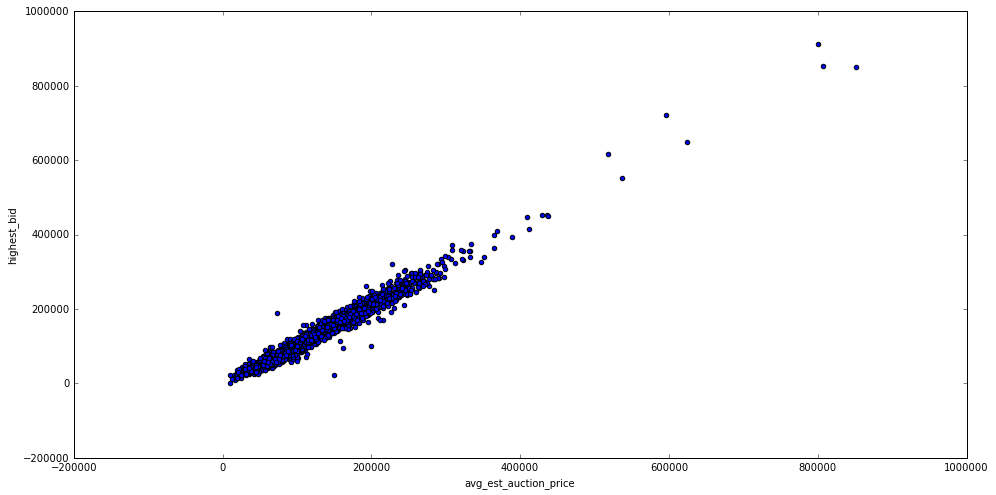

In [359]:
datasubset.plot(kind='scatter', x='avg_est_auction_price', y='highest_bid', figsize=(16,8))

### Data visualization

Top 10 auction winners

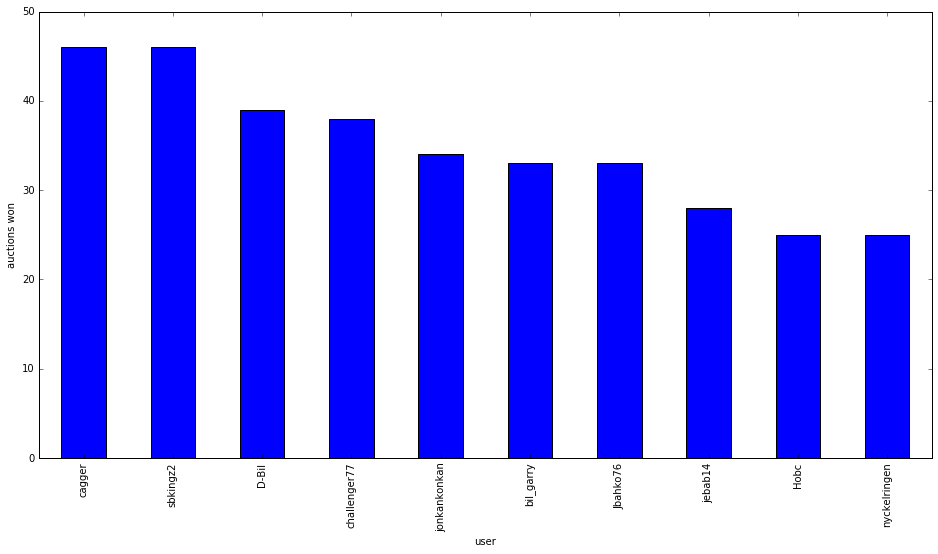

In [430]:
nr_of_bids_by_bidder['bidder'] = datasubset['bidder']
nr_of_bids_by_bidder = datasubset['bidder'].groupby(datasubset['bidder']).size() 
nr_of_bids_by_bidder = nr_of_bids_by_bidder[nr_of_bids_by_bidder.ix[:,] > 5] 
nr_of_bids_by_bidder.sort_values(ascending=False, inplace=True)
nr_of_bids_by_bidder = nr_of_bids_by_bidder.head(10)
ax = nr_of_bids_by_bidder.plot(kind='bar', figsize=(16,8))
ax.set_ylabel('auctions won')
ax.set_xlabel('user')